# YASİN BAHADIR ELİBOL - bahadirelibol60@gmail.com 
## Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi
### Farklı sektörlerdeki hisse senetlerinin zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha çok benzediğini tespit etmek ve bu bilgiyi yatırım stratejileri için kullanmak.

In [89]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [90]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [91]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1276,12.00T,0.17%,16.00,20.02%,0.11%,34.93%
1,Healthcare,1158,"7,991.70B",0.50%,61.09,3.08%,-0.30%,9.03%
2,Technology,770,21.65T,0.49%,46.11,14.60%,-0.73%,42.36%
3,Industrials,666,"5,955.52B",1.18%,29.56,7.26%,0.07%,24.90%
4,Consumer Discretionary,561,"8,740.85B",0.77%,29.28,6.52%,-0.23%,33.31%
5,Materials,265,"2,036.56B",1.71%,27.66,6.33%,-0.29%,14.24%
6,Real Estate,262,"1,683.63B",3.82%,49.72,9.47%,0.52%,13.41%
7,Energy,251,"3,695.85B",3.12%,13.63,8.15%,0.54%,14.70%
8,Communication Services,248,"6,862.98B",1.40%,30.38,11.72%,-0.51%,37.68%
9,Consumer Staples,243,"4,288.66B",1.51%,29.78,4.94%,0.43%,28.64%


In [ ]:
#Yukarıdaki fonksiyonlar yardımıyla, hangi sembollerin hangi sektörlere ait olduğu bilgisine erişim sağlanabilir ve bu bilgiler,
#.csv dosyalarına kaydedilebilir.
fetch_data(sectors='energy').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/materials.csv')
fetch_data(sectors='industrials').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv(r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/communication-services.csv')

In [92]:
finance = pd.read_csv('C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/financials.csv')
finance.Symbol

0      BRK.B
1        JPM
2          V
3         MA
4        BAC
       ...  
874     NCPL
875     LGHL
876     RELI
877     BENF
878     DRDB
Name: Symbol, Length: 879, dtype: object

In [93]:
import yfinance
ticker_name = yfinance.Ticker("JPM")
ticker_name.info

{'address1': '383 Madison Avenue',
 'city': 'New York',
 'state': 'NY',
 'zip': '10179',
 'country': 'United States',
 'phone': '212 270 6000',
 'website': 'https://www.jpmorganchase.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'JPMorgan Chase & Co. operates as a financial services company worldwide. It operates through three segments: Consumer & Community Banking, Commercial & Investment Bank, and Asset & Wealth Management. It offers deposit, investment and lending products, cash management, and payments and services; mortgage origination and servicing activities; residential mortgages and home equity loans; and credit cards, auto loans, leases, and travel services to consumers and small businesses through bank branches, ATMs, and digital and telephone banking. The company also provid

In [94]:
ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'JPM',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 322151400,
 'regularMarketTime': 1739307602,
 'hasPrePostMarketData': True,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 274.99,
 'fiftyTwoWeekHigh': 278.55,
 'fiftyTwoWeekLow': 174.42,
 'regularMarketDayHigh': 276.21,
 'regularMarketDayLow': 269.72,
 'regularMarketVolume': 5895637,
 'longName': 'JPMorgan Chase & Co.',
 'shortName': 'JP Morgan Chase & Co.',
 'chartPreviousClose': 270.43,
 'previousClose': 271.04,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'end': 1739370600,
   'start': 1739350800,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'end': 1739394000,
   'start': 1739370600,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'end': 1739408400,
   'start': 1739394000,
   'gmtoffset': -18000}},
 'tradingPeriods': 

In [95]:
data=ticker_name.history(period='1mo')
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-05 00:00:00-05:00,268.910004,270.640015,268.329987,270.429993,5704400,0.0,0.0
2025-02-06 00:00:00-05:00,272.450012,276.980011,271.190002,276.899994,7264400,0.0,0.0
2025-02-07 00:00:00-05:00,277.269989,278.549988,274.709991,275.799988,6857900,0.0,0.0
2025-02-10 00:00:00-05:00,276.149994,276.179993,269.589996,271.040009,8627400,0.0,0.0
2025-02-11 00:00:00-05:00,270.260010,276.220001,269.660004,274.989990,7195500,0.0,0.0


**Veri Toplama:**
Bu kod, her bir sektör için CSV dosyalarından hisse sembollerini okuyarak, yfinance aracılığıyla 2005'ten itibaren aylık fiyat verilerini indirir ve bu veriler üzerinden her sembol için aylık getiri hesaplaması yapar. Hesaplanan getiri verilerine sembol ve sektör bilgileri eklenip birleştirildikten sonra, her sektör için ayrı CSV dosyalarına kaydedilir. Ayrıca, API istek sınırını aşmamak için her sembol arasında 0.5 saniyelik bekleme süresi uygulanmaktadır.

In [20]:
import yfinance as yf
import pandas as pd
import time

# sektör ve dosya yollarını eşleştirmek için
sectors_and_files = {
    'financials': r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/financials.csv',
    'healthcare': r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/healthcare.csv',
    'technology': r'C:/Users/BAHADIR/Desktop/odev/data/stock_sectors/technology.csv'
}

def fetch_and_save_monthly_returns(input_csv, output_csv, sector_label):
    # csv dosyasından sembol listesini okuduk
    symbols_df = pd.read_csv(input_csv)
    print(f"Sektör: {sector_label}, Semboller: {symbols_df['Symbol'].nunique()} sembol bulundu.")

    # ilk 500 sembolü eğer varsa seçtik
    symbols = symbols_df['Symbol'].tolist()[:500]
    all_returns = []

    for symbol in symbols:
        print(f"{symbol} için veri getiriliyor")
        try:
            # 2005-01-01 den itibaren aylık verileri çekelim
            stock_data = yf.download(symbol, start="2005-01-01", interval='1mo')
            
            if stock_data.empty:
                print(f"{symbol} için veri bulunamadı. Atlayıp devam ediyoruz...")
                continue

            # adj close veya close sütununu kullanıyoruz
            if 'Adj Close' in stock_data.columns:
                stock_data['Price'] = stock_data['Adj Close']
            elif 'Close' in stock_data.columns:
                stock_data['Price'] = stock_data['Close']
            else:
                print(f"{symbol} için uygun fiyat sütunu bulunamadı. Atlanıyor...")
                continue

            # aylık getiri hesaplıyoruz (bir önceki ayın kapanışına göre yüzdelik değişim)
            stock_data['Monthly Return'] = stock_data['Price'].pct_change()
            stock_data['Symbol'] = symbol
            stock_data['Sector'] = sector_label  # sektör bilgisini ekliyoruz
            stock_data.reset_index(inplace=True)
            all_returns.append(stock_data[['Date', 'Symbol', 'Sector', 'Price', 'Monthly Return']])

        except Exception as e:
            print(f"{symbol} için veri getirilemedi: {e}")
        
        # API sınırını aşmamak için bekletme yapıyoruz
        time.sleep(0.5)

    # tüm sembollerden gelen verileri birleştirip csv olarak kaydediyoruz
    if all_returns:
        result = pd.concat(all_returns)
        result['Date'] = pd.to_datetime(result['Date'])  
        result.to_csv(output_csv, index=False)
        print(f"Aylık getiriler {output_csv} dosyasına kaydedildi.")
    else:
        print(f"{input_csv} için veri alınmadı")

# her sektör için bu işlemi tekrarlıyoruz ve sektör etiketini ekliyoruz
for sector, input_csv in sectors_and_files.items():
    output_csv = f'C:\\Users\\BAHADIR\\Desktop\\odev\\data\\{sector}_monthly_returns.csv'
    fetch_and_save_monthly_returns(input_csv, output_csv, sector_label=sector)

Sektör: financials, Semboller: 879 sembol bulundu.
BRK.B için veri getiriliyor


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


BRK.B için veri bulunamadı. Atlayıp devam ediyoruz...
JPM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

V için veri getiriliyor


MA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BAC için veri getiriliyor


WFC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AXP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HSBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BLK için veri getiriliyor


SPGI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HDB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SCHW için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PGR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MUFG için veri getiriliyor


KKR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UBS için veri getiriliyor


CB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MMC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IBN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APO için veri getiriliyor


SMFG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ICE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PYPL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CME için veri getiriliyor


AON için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SAN için veri getiriliyor


PNC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AJG için veri getiriliyor


COF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

USB için veri getiriliyor


BMO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MFG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

COIN için veri getiriliyor


BNS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NU için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BBVA için veri getiriliyor


TFC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ARES için veri getiriliyor


BK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CM için veri getiriliyor


AFL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MET için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRV için veri getiriliyor


ITUB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BCS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MFC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ING için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DFS için veri getiriliyor


LYG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


NDAQ için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MSCI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AIG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HOOD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NWG için veri getiriliyor


PRU için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OWL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACGL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RJF için veri getiriliyor


SLF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WTW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MTB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HIG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FCNCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BRO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TW için veri getiriliyor


FCNCA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FITB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

STT için veri getiriliyor


LPLA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SYF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TROW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BAM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RKT için veri getiriliyor


HBAN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


IX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TPG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IBKR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MKL için veri getiriliyor


KB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


WRB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PUK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CBOE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NTRS için veri getiriliyor


CINF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BBD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERIE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CFG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KEY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NMR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRU için veri getiriliyor


CRBG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

L için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PFG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FDS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RYAN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SHG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EQH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BSBR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SOFI için veri getiriliyor


FNF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ARCC için veri getiriliyor


JEF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


EG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RGA için veri getiriliyor


BAP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UNM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MORN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EWBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FUTU için veri getiriliyor


CNA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BCH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HLI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GGAL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RNR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALLY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SF için veri getiriliyor


EVR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AFG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FHN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BEN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SEIC için veri getiriliyor


AIZ için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AEG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SSB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


GL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


KNSL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BNT için veri getiriliyor


WBS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BSAC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CIB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PRI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UWMC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


WAL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PNFP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ORI için veri getiriliyor


CBSH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CFR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HLNE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CMA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FRHC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WTFC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IVZ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MKTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZION için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OBDC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AXS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

STEP için veri getiriliyor


PB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ONB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BMA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BPOP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BOKF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

JHG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RLI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PJT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VOYA için veri getiriliyor


JXN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COOP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OMF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FSK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FAF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MTG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QFIN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CADE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VIRT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CACC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRVL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HOMB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MARA için veri getiriliyor


LNC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


MC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


MAIN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SLM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COLB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OZK için veri getiriliyor


AMG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UPST için veri getiriliyor


VLY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UMBF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GBCI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

THG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FNB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DNB için veri getiriliyor


PFSI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FFIN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BBAR için veri getiriliyor


ACT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SIGI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UBSI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HWC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PIPR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RDN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WTM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FLG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FCFS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESGR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SFBS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BWIN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LAZ için veri getiriliyor


AGO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BGC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CNS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ABCB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMPR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VCTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GBDC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNO için veri getiriliyor


IBOC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ASB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


GSHD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NNI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AX için veri getiriliyor


BANF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UCB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TFSL için veri getiriliyor


RIOT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EBC için veri getiriliyor


FULT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BHF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TCBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FHB için veri getiriliyor


APAM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HTGC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNEX için veri getiriliyor


WU için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IFS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CBU için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FIBK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FBP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AUB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CATY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HGTY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AVAL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WSFS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BUR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GNW için veri getiriliyor


FHI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NMIH için veri getiriliyor


BFH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BKU için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BOH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TBBK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ENVA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CVBF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PLMR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HTLF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INDB için veri getiriliyor


SFNC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CLSK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MCY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BANC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TOWN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FFBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FRME için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GCMG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RNST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FBK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PPBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BANR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PFS için veri getiriliyor


WAFD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SBCF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WSBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LMND için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRMK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PWP için veri getiriliyor


NBTB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EFSC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SYBT için veri getiriliyor


AGM.A için veri getiriliyor


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGM.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

AGM.A için veri bulunamadı. Atlayıp devam ediyoruz...
AGM için veri getiriliyor


TSLX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


IREN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


LU için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FINV için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TRUP için veri getiriliyor


HTH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


OFG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CASH için veri getiriliyor


MBIN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CIFR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HUT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PSEC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FIHL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PAX için veri getiriliyor


SKWD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FBNC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


STC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TFIN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CUBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WULF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CHCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NIC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LKFN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BBUC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SUPV için veri getiriliyor


FCF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NWBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TWFG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NTB için veri getiriliyor


NBHC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


LOB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HMN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SRCE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLBK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GSBD için veri getiriliyor


SASR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

STEL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

STBA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LC için veri getiriliyor


ROOT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VBTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TCBK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VRTS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HOPE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NAVI için veri getiriliyor


BLX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CET için veri getiriliyor


WABC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BUSE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BHLB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DCOM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OCSL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CCB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TIGR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MFIC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HCI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QCRH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SEZL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RBCAA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NMFC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EIG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GABC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FBMS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OPFI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PFBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BCSF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FSUN için veri getiriliyor


OBK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ECPG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SAFT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SII için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PEBO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IGIC için veri getiriliyor


CSWC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BRKL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BBDC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMAL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BOW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OCFC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BFC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TMP için veri getiriliyor


PFC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BRDG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMTB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BHRB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CTBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NCDL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMSF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNOB için veri getiriliyor


SBSI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CGBD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PFLT için veri getiriliyor


AAMI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SLRC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FMBH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TRIN için veri getiriliyor


UVSP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ATLC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HFWA için veri getiriliyor


PRAA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MTAL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OSBC için veri getiriliyor


NBN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


NBBK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


FUFU için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CPF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CFB için veri getiriliyor


BFST için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FCBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TCPC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TYG için veri getiriliyor


EGBN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MBWM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FDUS için veri getiriliyor


CFFN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MCBS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HBT için veri getiriliyor


GHLD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PRA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CAC için veri getiriliyor


IBCP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EQBK için veri getiriliyor


WRLD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CCAP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TIPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ABL için veri getiriliyor


SLQT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HBNC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LPRO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NOAH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HAFC için veri getiriliyor


MCB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BITF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OPY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AACT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESQ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GSBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMRK için veri getiriliyor


ORRF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VINP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GLAD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MOFG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EZPW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HIPO için veri getiriliyor


FSBC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HTBI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CION için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UFCS için veri getiriliyor


WASH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VEL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CCBG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BZAI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TREE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMBK için veri getiriliyor


CRD.A için veri getiriliyor


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CRD.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


CRD.A için veri bulunamadı. Atlayıp devam ediyoruz...
HTBK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ACIC için veri getiriliyor


SPFI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CRD.B için veri getiriliyor


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CRD.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

CRD.B için veri bulunamadı. Atlayıp devam ediyoruz...
MPB için veri getiriliyor


THFF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AMBC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UVE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FISI için veri getiriliyor


HIFS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PGC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BCAL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SHBI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LDI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALRS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CBNK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALTI için veri getiriliyor


CCNE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PSBD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


EBTC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PFIS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FMNB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DGICB için veri getiriliyor


DGICA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


GAIN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NFBK için veri getiriliyor


TCBX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GBLI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

YRD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BHB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UNTY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NRIM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GLRE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GDOT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PNNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GNTY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ANSC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FFIC için veri getiriliyor


GCBC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VBNK için veri getiriliyor


Aylık getiriler C:\Users\BAHADIR\Desktop\odev\data\financials_monthly_returns.csv dosyasına kaydedildi.
Sektör: healthcare, Semboller: 1167 sembol bulundu.
LLY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UNH için veri getiriliyor


NVO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


JNJ için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABBV için veri getiriliyor


MRK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TMO için veri getiriliyor


ABT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AZN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ISRG için veri getiriliyor


DHR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BSX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SYK için veri getiriliyor


PFE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SNY için veri getiriliyor


GILD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BMY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VRTX için veri getiriliyor


MDT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ELV için veri getiriliyor


HCA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZTS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MCK için veri getiriliyor


BDX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

REGN için veri getiriliyor


GSK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CVS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EW için veri getiriliyor


A için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HLN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TAK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARGX için veri getiriliyor


GEHC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


IDXX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VEEV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IQV için veri getiriliyor


HUM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


RMD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ALNY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DXCM için veri getiriliyor


CNC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CAH için veri getiriliyor


MTD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BNTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PHG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WAT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ONC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NTRA için veri getiriliyor


ZBH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

STE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BIIB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LH için veri getiriliyor


ILMN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TEVA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PODD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

COO için veri getiriliyor


RPRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MOH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DGX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HOLX için veri getiriliyor


ICLR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BAX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ALGN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UTHR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NBIX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMMT için veri getiriliyor


RVTY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AVTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FMS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DVA için veri getiriliyor


MRNA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INCY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INSM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ITCI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

THC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VTRS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SOLV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GMAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GMED için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UHS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BMRN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RDY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TECH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DOCS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SRPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PCVX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MEDP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ATR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EXAS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BIO.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-02-12)')


BIO.B için veri getiriliyor
BIO.B için veri bulunamadı. Atlayıp devam ediyoruz...
EHC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BIO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HSIC için veri getiriliyor


HQY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

QGEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EXEL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MASI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RGEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TEM için veri getiriliyor


GKOS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WBA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BRKR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CHE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TFX için veri getiriliyor


ENSG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ROIV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RVMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASND için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

JAZZ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MDGL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HALO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BPMC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CORT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LEGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LNTH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MMSI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BBIO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NUVL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TLX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BLCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

STVN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ELAN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CYTK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INSP için veri getiriliyor


GRFS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


OPCH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AXSM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IONS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALKS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VRNA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RDNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NARI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ITGR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KRYS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TGTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AKRO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACHC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OSCR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BTSG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RARE için veri getiriliyor


PRCT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RNA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SHC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ICUI için veri getiriliyor


XRAY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BHVN için veri getiriliyor


ADMA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ALVO için veri getiriliyor


PBH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SRRK için veri getiriliyor


PTCT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RYTM için veri getiriliyor


CRNX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IMVT için veri getiriliyor


VKTX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ACLX için veri getiriliyor


APLS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VCYT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRSP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IRTC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRGO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HAE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DNLI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WRBY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SGRY için veri getiriliyor


LFST için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XENE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMED için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACAD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TWST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CON için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZLAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALHC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VCEL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MLTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QDEL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FOLD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MTSR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MRUS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RXRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRVA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PDCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SWTX için veri getiriliyor


EWTX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LIVN için veri getiriliyor


CPRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BHC için veri getiriliyor


NVCR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SEM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMRX için veri getiriliyor


JANX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MESO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KYMR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TNDM için veri getiriliyor


AZTA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NEOG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARWR için veri getiriliyor


VERA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HCM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


NAMS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


IBRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MIRM için veri getiriliyor


APGE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CERT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TMDX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNTA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ADUS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PTGX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PACS için veri getiriliyor


CGON için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HRMY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PINC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LGND için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LMAT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SLNO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARDT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLOV için veri getiriliyor


SUPN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TARS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UFPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OMCL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IDYA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IART için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BEAM için veri getiriliyor


PGNY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WGS için veri getiriliyor


ATRC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AGIO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IRON için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GDRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NEO için veri getiriliyor


ASTH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BLTE için veri getiriliyor


SDGR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


WVE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TXG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IOVA için veri getiriliyor


TVTX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


GERN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


DVAX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TDOC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GPCR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PHR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ATEC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMPH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IMCR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EVO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BCRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLDX için veri getiriliyor


NHC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GLPG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MNKD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VRDN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARQT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INDV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NRIX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRAX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FTRE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GRDN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AHCO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DYN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KNSA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AGL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VIR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVAX için veri getiriliyor


RXST için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


USPH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SYRE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ETNB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AORT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PLSE için veri getiriliyor


MDXG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ARDX için veri getiriliyor


XNCR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MRVI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BLFS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CDNA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DAWN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LQDA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OCUL için veri getiriliyor


PCRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RCUS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNDX için veri getiriliyor


SPRY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


MD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WEAV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARVN için veri getiriliyor


INVA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

STAA için veri getiriliyor


EVH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ADPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ANIP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MYGN için veri getiriliyor


AUPH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FNA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ELVN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RCKT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HROW için veri getiriliyor


REPL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EMBC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GHRS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

COLL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OPK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZYME için veri getiriliyor


COGT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GYRE için veri getiriliyor


HSTM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


NTLA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BBNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GRAL için veri getiriliyor


OCS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PHVS için veri getiriliyor


BKDT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


TLRY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AVBP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BKD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OMI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BCYC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PNTG için veri getiriliyor


BGM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABCL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAHC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EOLS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IMNM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESTA için veri getiriliyor


AVAH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CBLL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BFLY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CVAC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AXGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CDMO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TECX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HCSG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CSTL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NUVB için veri getiriliyor


AVDL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IRMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AVXL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TYRA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QURE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DH için veri getiriliyor


ORIC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AVNS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRON için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RLAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRTA için veri getiriliyor


MAZE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SEPN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SIBN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BVS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LENZ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OFIX için veri getiriliyor


SANA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CAPR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SLP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CTKB için veri getiriliyor


BCAX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


DNTH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DNA için veri getiriliyor


PLRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IMTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PHAR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TMCI için veri getiriliyor


ABUS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AUNA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

STOK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KURA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CCRN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VERV için veri getiriliyor


CGEM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AUTL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KIDS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SVRA için veri getiriliyor


LAB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RAPP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACCD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EBS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VREX için veri getiriliyor


UPB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HUMA için veri getiriliyor


XERS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ANAB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INNV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EYPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ERAS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TALK için veri getiriliyor


MNMD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


RNAC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SENS için veri getiriliyor


MLYS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FLGT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MXCT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SRDX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DCTH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OMER için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DCGO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MGTX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PROK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ANGO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

URGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TKNO için veri getiriliyor


TRDA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VALN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TBPH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AKBA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MREO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMLR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CELC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KROS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ORGO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KALV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRTC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ETON için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QTRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SAGE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARCT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OLMA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EHAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ATXS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNDA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CMPX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CYH için veri getiriliyor


SIGA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PACB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZVRA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALMS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TCMD için veri getiriliyor


ABSI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


TRML için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NPCE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NNOX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ABVX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KMDA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ANNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PHAT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NYXH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GLUE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AURA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RVNC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OABI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NRC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CVRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RGNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PGEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZIMV için veri getiriliyor


TERN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RIGL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALLO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PSNL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AHG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CMRX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRVI için veri getiriliyor


TBRG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ESPR için veri getiriliyor


IRWD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PRME için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRVS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CERS için veri getiriliyor


CDXS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KOD için veri getiriliyor


HCAT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ENGN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

QSI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SPOK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MBX için veri getiriliyor


ZBIO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TNGX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KRRO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMTI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

XOMA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALDX için veri getiriliyor


NMRA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSHA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OSUR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CADL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RZLT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IMMP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MPLN için veri getiriliyor


Aylık getiriler C:\Users\BAHADIR\Desktop\odev\data\healthcare_monthly_returns.csv dosyasına kaydedildi.
Sektör: technology, Semboller: 771 sembol bulundu.
AAPL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MSFT için veri getiriliyor


NVDA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AVGO için veri getiriliyor


TSM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ORCL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SAP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASML için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CSCO için veri getiriliyor


IBM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NOW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ADBE için veri getiriliyor


QCOM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PLTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INTU için veri getiriliyor


TXN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ARM için veri getiriliyor


SHOP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AMAT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


UBER için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ANET için veri getiriliyor


SONY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ADP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PANW için veri getiriliyor


LRCX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ADI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MU için veri getiriliyor


KLAC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CRWD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MRVL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INFY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INTC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TEAM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CDNS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MSTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNPS için veri getiriliyor


MSI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FTNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DELL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WDAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ADSK için veri getiriliyor


ROP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SNOW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TTD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

XYZ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAYX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NXPI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DDOG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NET için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FICO için veri getiriliyor


FIS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


TEL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IT için veri getiriliyor


GLW için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GRMN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CTSH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HUBS için veri getiriliyor


WIT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ZS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ANSS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MPWR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KEYS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GDDY için veri getiriliyor


HPQ için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IOT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MCHP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FTV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HPE için veri getiriliyor


GIB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CPAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CDW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TYL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NOK için veri getiriliyor


ERIC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NTAP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CHKP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TDY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GFS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TOST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PTC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WDC için veri getiriliyor


TWLO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ASX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ON için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PSTG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VRSN için veri getiriliyor


STM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SSNC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

STX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MDB için veri getiriliyor


ZBRA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DOCU için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LDOS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GRAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AFRM için veri getiriliyor


NTNX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


TER için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CYBR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRMB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KSPI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FSLR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GWRE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AZPN için veri getiriliyor


JBL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FFIV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OKTA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DUOL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UMC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMCI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FLEX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LOGI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ENTG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AKAM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BSY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EPAM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SWKS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

COHR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RBRK için veri getiriliyor


JKHY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WIX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MANH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MNDY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KVYO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CIEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

YMM için veri getiriliyor


JNPR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PCOR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GTLB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAYC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESTC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PCTY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AUR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRDO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FOUR için veri getiriliyor


NICE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DSGX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DBX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DOX için veri getiriliyor


BILL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ONTO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MTSI için veri getiriliyor


ALTR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CFLT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PEGA için veri getiriliyor


GLOB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TTAN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VERX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CACI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

G için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

U için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ENPH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IONQ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APPF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PSN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EXLS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FN için veri getiriliyor


SATS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INFA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QRVO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PATH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

S için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OTEX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LSCC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MKSI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WEX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CCCS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NXT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HCP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVMI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CWAN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CVLT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OLED için veri getiriliyor


OS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPSC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CGNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RMBS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SRAD için veri getiriliyor


BMI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ARW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASTS için veri getiriliyor


AMKR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LFUS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LITE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QTWO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LYFT için veri getiriliyor


ACIW için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SMTC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FRSH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NSIT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TSEM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INTA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INGM için veri getiriliyor


QXO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SAIC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NOVT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLBT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRUS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TENB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VRNS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QLYS için veri getiriliyor


SOUN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BOX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GDS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ITRI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASAN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SITM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RELY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BDC için veri getiriliyor


IDCC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PONY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BRZE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SANM için veri getiriliyor


AVT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EEFT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SLAB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALGM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CAMT için veri getiriliyor


ZETA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GBTG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PYCR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AI için veri getiriliyor


DXC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FROG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASGN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NCNO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ST için veri getiriliyor


PLXS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BLKB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAYO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DLO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CLVT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DOCN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALIT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ZI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AVPT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DV için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RGTI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALKT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LIF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

POWI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RUM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ESE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CORZ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

YOU için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNXC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OSIS için veri getiriliyor


SYNA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GRND için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMBA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LPL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FORM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IPGP için veri getiriliyor


RNG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FIVN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TDC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALRM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PAR için veri getiriliyor


ODD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

STNE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VIAV için veri getiriliyor


DIOD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CALX için veri getiriliyor


WNS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SEMR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SWI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BTDR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APPN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AGYS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TTMI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRGS için veri getiriliyor


FLYW için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RPD için veri getiriliyor


PAGS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KLIC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NATL için veri getiriliyor


VSH için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


LSPD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VICR için veri getiriliyor


RZLV için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CXM için veri getiriliyor


IBTA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RAMP için veri getiriliyor


AVDX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ACLS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PLUS için veri getiriliyor


EVTC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EXTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RUN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VNET için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNXN için veri getiriliyor


JAMF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DFIN için veri getiriliyor


MQ için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


DAVA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SPT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


GDYN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


EVCM için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NABL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SIMO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VYX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NTCT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HIMX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ROG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MTTR için veri getiriliyor


GB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SONO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CSGS için veri getiriliyor


KN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

QBTS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

UCTT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DBD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INFN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NN için veri getiriliyor


UPBD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


ZUO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VRNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AMPL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

APLD için veri getiriliyor


CTS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


BHE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TUYA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SPNS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MLNK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MXL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ENFN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EXOD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FORTY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ATEN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TASK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

FSLY için veri getiriliyor


ADEA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PLAB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VECO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NYAX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KARO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DSP için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SMWB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AAOI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HLIT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DCBO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ACMR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SABR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

QUBT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VTEX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DQ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OLO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DAVE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PSFE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VSAT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRCT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DGII için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VMEO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ARRY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AOSL için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

JKS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PENG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PDFS için veri getiriliyor


XRX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


COHU için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COMM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BELFB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TIXT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BBAI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BELFA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

INOD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ML için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SCSC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BLND için veri getiriliyor


RDWR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CRSR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CINT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BASE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ICHR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

WOLF için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ETWO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

HCKT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RSKD için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

YEXT için veri getiriliyor


IIIV için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


INDI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ADTN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

GCT için veri getiriliyor


SHLS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SSYS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NTGR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AIOT için veri getiriliyor


DMRC için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SCWX için veri getiriliyor


MLAB için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DAKT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SEDG için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CEVA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PRTH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

PUBM için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OSPN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RPAY için veri getiriliyor


IMOS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PGY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CGNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ITRN için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CSIQ için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RCAT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

YALA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MGIC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CNDT için veri getiriliyor


CAN için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DGNX için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LYTS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

RXT için veri getiriliyor


CTLP için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FARO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IMXI için veri getiriliyor


DJCO için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CLMB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVTS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CCSI için veri getiriliyor


LASR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

API için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRNC için veri getiriliyor


DDD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


HKD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NNDM için veri getiriliyor


RDVT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CLFD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


LGTY için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

OUST için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

SKYT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BAND için veri getiriliyor


MTLS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BIGC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BKSY için veri getiriliyor


MITK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PRCH için veri getiriliyor


UIS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AIP için veri getiriliyor


ALNT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


KULR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GILT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

XPER için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TRAK için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

CRNT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MEI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

KLTR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

OOMA için veri getiriliyor


LSAK için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

POET için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TBCH için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EGHT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NVEC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

TSSI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

DOMO için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AEHR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NRDY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

MVIS için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

VUZI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ASUR için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ALLT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

NOVA için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EXFY için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

AUDC için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

EB için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

BLZE için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

LAES için veri getiriliyor


VPG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LAW için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

IBEX için veri getiriliyor


ONTF için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SMRT için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ILLR için veri getiriliyor


TSAT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ATGL için veri getiriliyor


IMMR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


APPS için veri getiriliyor


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RMNI için veri getiriliyor



[*********************100%***********************]  1 of 1 completed

ICG için veri getiriliyor


Aylık getiriler C:\Users\BAHADIR\Desktop\odev\data\technology_monthly_returns.csv dosyasına kaydedildi.


In [96]:
#dosyalar kaydedildimi ve doğru çalışıyrmu diye test ettim
import pandas as pd

# örnek olarak finans sektörünü kontrol ettim
deneme_path = r'C:/Users/BAHADIR/Desktop/odev/data/financials_monthly_returns.csv'

f_data = pd.read_csv(deneme_path)

print(f"{deneme_path} içeriği:")
print(f_data.head())  

C:/Users/BAHADIR/Desktop/odev/data/financials_monthly_returns.csv içeriği:
         Date Symbol      Sector      Price  Monthly Return
0         NaN    NaN         NaN        NaN             NaN
1  2005-01-01    JPM  financials  21.668657             NaN
2  2005-02-01    JPM  financials  21.401770       -0.012317
3  2005-03-01    JPM  financials  20.259943       -0.053352
4  2005-04-01    JPM  financials  20.781082        0.025723


Financial dataset boş değer sayıları:
Date                1
Symbol              1
Sector              1
Price               1
Monthly Return    497
dtype: int64

Healthcare dataset boş değer sayıları:
Date                1
Symbol              1
Sector              1
Price               1
Monthly Return    497
dtype: int64

Technology dataset boş değer sayıları:
Date                1
Symbol              1
Sector              1
Price               1
Monthly Return    501
dtype: int64


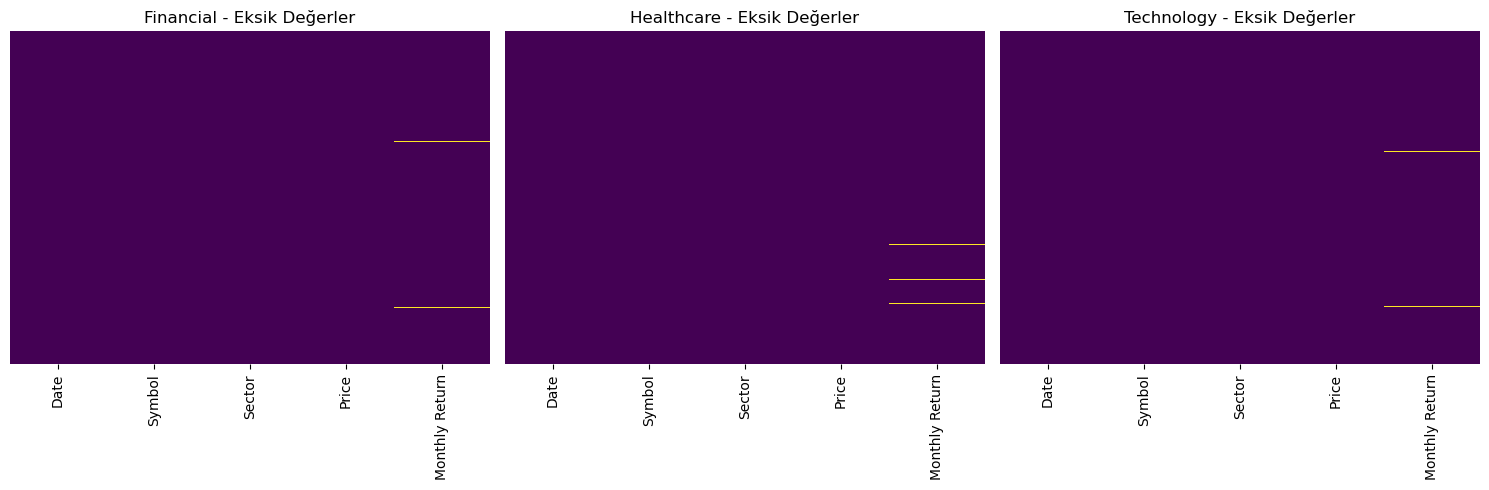

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

financial_path = "C:/Users/BAHADIR/Desktop/odev/data/financials_monthly_returns.csv"
healthcare_path = "C:/Users/BAHADIR/Desktop/odev/data/healthcare_monthly_returns.csv"
technology_path = "C:/Users/BAHADIR/Desktop/odev/data/technology_monthly_returns.csv"

financial_df = pd.read_csv(financial_path)
healthcare_df = pd.read_csv(healthcare_path)
technology_df = pd.read_csv(technology_path)

# boş-eksik değerlerin kontrolü
print("Financial dataset boş değer sayıları:")
print(financial_df.isnull().sum())
print("\nHealthcare dataset boş değer sayıları:")
print(healthcare_df.isnull().sum())
print("\nTechnology dataset boş değer sayıları:")
print(technology_df.isnull().sum())

# eksik değerlerin görselleştirilmesi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(financial_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Financial - Eksik Değerler")

plt.subplot(1, 3, 2)
sns.heatmap(healthcare_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Healthcare - Eksik Değerler")

plt.subplot(1, 3, 3)
sns.heatmap(technology_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Technology - Eksik Değerler")

plt.tight_layout()
plt.show()

**Veri Ön İşleme**, **Öznitelik Çıkarımı ve Seçme** ve **Model Geliştirme:**
Öncelikle farklı sektörlerden elde edilen hisse senedi verileri CSV dosyalarından okunarak temizlenip log dönüşümleri uygulanıyor, ardından tsfresh kütüphanesiyle zaman serisi öznitelikleri çıkarılıyor ve LassoCV ile öznitelik seçimi yapılıyor. Tüm bu adımlar, scikit-learn Pipeline yapısı içerisinde modüler hale getiriliyor; sonrasında seçilen öznitelikler kullanılarak GridSearchCV ile RandomForestClassifier’ın hiperparametreleri optimize edilip model eğitiliyor ve en iyi parametreler ile cross-validation doğruluğu ekrana yazdırılıyor.

In [41]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import MinimalFCParameters
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
import os
from sklearn import set_config
set_config(display='diagram')

# uyarıları görmezden gelmek için
warnings.filterwarnings("ignore")

# veri okuma, temizleme ve log dönüşümü
class DataLoaderCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, sectors_and_files):
        self.sectors_and_files = sectors_and_files

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        combined_df_list = []
        for sector, file_path in self.sectors_and_files.items():
            df = pd.read_csv(file_path, parse_dates=['Date'])
            df = df.drop(index=0)  # 0. satırı siliyoruz çünkü boş
            df = df.dropna(subset=['Date', 'Symbol'])  # Boş tarih veya sembol varsa siliyoruz
            df['Sector'] = sector  
            combined_df_list.append(df)
        
        combined_df = pd.concat(combined_df_list, ignore_index=True)
        
        # eksik değerleri ortalama ile dolduruyoruz
        numeric_cols = combined_df.select_dtypes(include='number').columns
        combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())
        
        # log dönüşümü
        combined_df['Log_Price'] = np.log(combined_df['Price'] + 1)
        combined_df['Log_Monthly_Return'] = np.log(combined_df['Monthly Return'] + 1)
        return combined_df

# label encoding ve sütun seçimi:
class LabelEncodingFeatureSelection(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.label_encoder_sector = LabelEncoder().fit(X['Sector'])
        self.label_encoder_symbol = LabelEncoder().fit(X['Symbol'])
        return self

    def transform(self, X):
        X = X.copy()
        X['Sector_Encoded'] = self.label_encoder_sector.transform(X['Sector'])
        X['Symbol_Encoded'] = self.label_encoder_symbol.transform(X['Symbol'])
        return X[['Symbol', 'Date', 'Log_Monthly_Return', 'Log_Price', 'Sector_Encoded']]

# öznitelik çıkarımı-tsfresh:
class TSFreshFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, n_jobs_value):
        self.fc_parameters = MinimalFCParameters()
        self.n_jobs_value = n_jobs_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df_filtered = X[['Symbol', 'Date', 'Log_Monthly_Return', 'Log_Price']]
        features = extract_features(
            df_filtered,
            column_id='Symbol',
            column_sort='Date',
            default_fc_parameters=self.fc_parameters,
            n_jobs=self.n_jobs_value
        )
        # her sembol için Sector_Encoded bilgisini ekliyoruz
        features = features.join(
            X[['Symbol', 'Sector_Encoded']].drop_duplicates().set_index('Symbol')
        )
        return features

# öznitelik Seçimi LassoCV ile L1 Regularizasyonu:
class LassoFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.selected_features = None

    def fit(self, X, y=None):
        # eğer y dışarıdan verilmemişse hedefi X içerisindeki Sector_Encoded sütunundan alıyoruz
        if y is None:
            y = X['Sector_Encoded']
        
        # Lasso için tsfresh tarafından üretilen özellikleri seçiyoruz
        # isimleri Log_Monthly_Return__ veya Log_Price__ ile başlayan özellikler kullanılacak
        X_filtered = X.filter(regex='^(Log_Monthly_Return|Log_Price)__')
        
        # ölçeklendirme
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_filtered)
        
        # LassoCV ile modeli eğitip uygun öznitelikleri seçiyoruz
        lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
        self.selected_features = X_filtered.columns[lasso.coef_ != 0]
        
        return self

    def transform(self, X):
         # seçilen özniteliklerin yanında hedef sütunu-Sector_Encoded a ekliyoruz
        return X[self.selected_features.tolist() + ['Sector_Encoded']]

# Pipeline Tanımlama
pipeline = Pipeline([
    ('data_loading_cleaning', DataLoaderCleaner(sectors_and_files={
        'financials': r'C:\Users\BAHADIR\Desktop\odev\data\financials_monthly_returns.csv',
        'healthcare': r'C:\Users\BAHADIR\Desktop\odev\data\healthcare_monthly_returns.csv',
        'technology': r'C:\Users\BAHADIR\Desktop\odev\data\technology_monthly_returns.csv'
    })),
    ('label_encoding_feature_selection', LabelEncodingFeatureSelection()),
    ('tsfresh_feature_extraction', TSFreshFeatureExtractor(n_jobs_value=max(1, os.cpu_count() - 1))),
    ('lasso_feature_selection', LassoFeatureSelector())
])

# veriyi pipeline ile işleme ve hedef değişkenini ayrıştırma:
processed_data = pipeline.fit_transform(None, None)
X = processed_data.drop(columns=['Sector_Encoded'])
y = processed_data['Sector_Encoded']

# model eğitimi ve hiperparametre optimizasyonu-grid search:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=max(1, os.cpu_count() - 1)
)

grid_search.fit(X, y)

print("\nEn iyi hiperparametreler:")
print(grid_search.best_params_)
print(f"En iyi modelin cross-validation doğruluğu: {grid_search.best_score_:.4f}")

Feature Extraction: 100%|██████████| 35/35 [00:04<00:00,  8.26it/s]



En iyi hiperparametreler:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
En iyi modelin cross-validation doğruluğu: 0.6066


In [98]:
pipeline

Pipeline(steps=[('data_loading_cleaning',
                 DataLoaderCleaner(sectors_and_files={'financials': 'C:\\Users\\BAHADIR\\Desktop\\tubitak_odev\\data\\financials_monthly_returns.csv',
                                                      'healthcare': 'C:\\Users\\BAHADIR\\Desktop\\tubitak_odev\\data\\healthcare_monthly_returns.csv',
                                                      'technology': 'C:\\Users\\BAHADIR\\Desktop\\tubitak_odev\\data\\technology_monthly_returns.csv'})),
                ('label_encoding_feature_selection',
                 LabelEncodingFeatureSelection()),
                ('tsfresh_feature_extraction',
                 TSFreshFeatureExtractor(n_jobs_value=7)),
                ('lasso_feature_selection', LassoFeatureSelector())])

Dört farklı sınıflandırma modeli (Random Forest, Gradient Boosting, XGBoost ve CatBoost) tanımlanıyor ve her model için 5-fold cross-validation kullanılarak ortalama doğruluk (accuracy) hesaplanıyor. Hesaplanan doğruluk değerleri bir sözlüğe kaydediliyor ve her modelin ortalama doğruluğu ekrana yazdırılıyor.

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Modelleri bir sözlükte tanımlıyoruz
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

scores = {}
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    scores[name] = score
    print(f"{name} modeli ortalama doğruluk: {score:.4f}")

Random Forest modeli ortalama doğruluk: 0.5951
Gradient Boosting modeli ortalama doğruluk: 0.5737
XGBoost modeli ortalama doğruluk: 0.5811
CatBoost modeli ortalama doğruluk: 0.5972


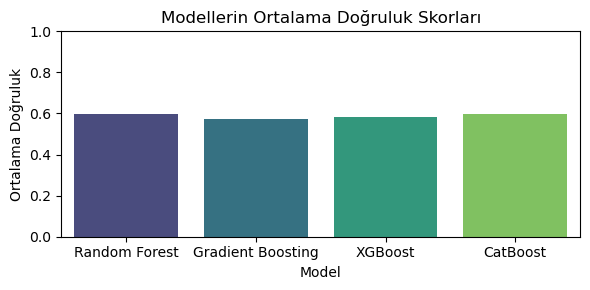

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# scores sözlüğünüzden model isimleri ve doğruluk skorlarını ayıralım
model_names = list(scores.keys())
accuracy_scores = list(scores.values())

plt.figure(figsize=(6, 3))
sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Ortalama Doğruluk")
plt.title("Modellerin Ortalama Doğruluk Skorları")
plt.ylim(0, 1) 
plt.tight_layout()
plt.show()

**Model Değerlendirme:** Veri seti %80 eğitim ve %20 test olarak stratified (sınıf dengesini koruyarak) şekilde bölünüyor. Ardından, GridSearchCV ile en iyi model parametreleri belirlenip eğitim verisi üzerinde model eğitiliyor; test verisi üzerinde yapılan tahminler ile doğruluk, weighted F1 skoru ve ROC-AUC hesaplanarak sonuçlar ekrana yazdırılıyor.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# eğitim ve test veri setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GridSearchCV ile model eğitimi (eğitim verisi üzerinde):
grid_search.fit(X_train, y_train)

# test verisi üzerinde tahmin yapma
y_pred = grid_search.predict(X_test)

# accuracy (doğruluk):
acc = accuracy_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test), multi_class='ovr')

print("Test Accuracy: {:.4f}".format(acc))
print("Test F1 Score: {:.4f}".format(f1))
print("Test ROC-AUC: {:.4f}".format(roc_auc))

Test Accuracy: 0.6221
Test F1 Score: 0.6192
Test ROC-AUC: 0.7973


Modelin test verisindeki tahminleriyle gerçek değerler arasındaki uyumu ölçmek için bir karışıklık matrisi (confusion matrix) oluşturur ve bu matrisi seaborn kullanarak ısı haritası şeklinde görselleştirir. Ardından, sklearn'un classification_report fonksiyonu ile sınıflandırma performansını (precision, recall, f1-score vb.) içeren detaylı bir raporu ekrana yazdırır.

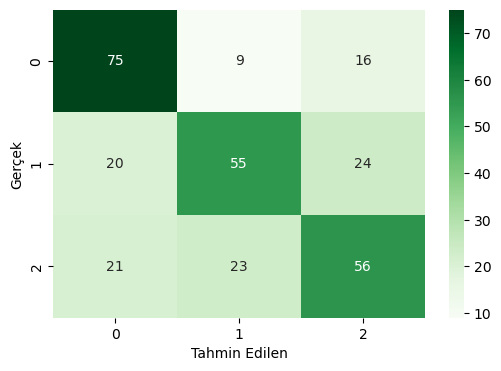

Classification Raporu:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       100
           1       0.63      0.56      0.59        99
           2       0.58      0.56      0.57       100

    accuracy                           0.62       299
   macro avg       0.62      0.62      0.62       299
weighted avg       0.62      0.62      0.62       299



In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# confusion matrixi görselleştirme 
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# classification report:
print("Classification Raporu:")
print(classification_report(y_test, y_pred))

Belirlenen **Real-Estate sektöründeki** ilk 10 hisse için yfinance kullanılarak 2005-2025 arası aylık veriler indirilmekte, her hisse için fiyat bilgisi ve aylık getiri hesaplanıp sembol ile sektör bilgileri ekleniyor. Elde edilen veriler temizlenip düzenlendikten sonra tüm hisse verileri birleştirilerek "realestate_stocks_monthly.csv" adlı dosyaya kaydediliyor. Ayrıca, API çağrı sınırlarını aşmamak için her istek arasında 0.5 saniyelik bekleme uygulanmaktadır.

In [23]:
import yfinance as yf
import pandas as pd
import time

# Real-Estate sektöründeki ilk 10 hisse:
realestate_stocks = ['PLD', 'EQIX', 'AMT', 'WELL', 'SPG', 'DLR', 'PSA', 'O', 'CBRE', 'CCI']
all_realestate_returns = []

print("Verileri Getirme:")
for symbol in realestate_stocks:
    print(f"{symbol} için veri getiriliyor")
    try:
        # aylık verileri indiriyoruz
        stock_data = yf.download(symbol, start="2005-01-01", end="2025-12-31", interval='1mo')
        if stock_data.empty:
            print(f"{symbol} için veri yok. Atlanıyor...")
            continue

        if 'Close' in stock_data.columns:
            stock_data['Price'] = stock_data['Close']
        elif 'Adj Close' in stock_data.columns:
            stock_data['Price'] = stock_data['Adj Close']
        else:
            print(f"{symbol} için ne ‘Close’ ne de ‘Adj Close’ sütunu bulunamadı. Atlanıyor...")
            continue

        # aylık getiri hesaplama
        stock_data['Monthly Return'] = stock_data['Price'].pct_change()
        stock_data['Symbol'] = symbol
        stock_data['Sector'] = 'real-estate'

        # tarihi sütun haline getirmek için indexi sıfırlıyoruz
        stock_data = stock_data.reset_index()

        # eğer sütunlar multiIndex ise düzleştiriyoruz:
        if isinstance(stock_data.columns, pd.MultiIndex):
            stock_data.columns = [' '.join([str(c) for c in col if c]) for col in stock_data.columns.values]
        else:
            stock_data.columns = [str(col).strip() for col in stock_data.columns]

        stock_data = stock_data[['Date', 'Symbol', 'Sector', 'Price', 'Monthly Return']]
        all_realestate_returns.append(stock_data)
    except Exception as e:
        print(f" {symbol} için veri getirilemedi: {e}")
    time.sleep(0.5) 

if all_realestate_returns:
    realestate_data_df = pd.concat(all_realestate_returns, ignore_index=True)
    realestate_data_df.to_csv("realestate_stocks_monthly.csv", index=False)
    print("\nReal estate verileri getirildi ve realestate_stocks_monthly.csv olarak kaydedildi")
else:
    print("Veri getirilemedi.")


Verileri Getirme:
PLD için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


EQIX için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


AMT için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


WELL için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


SPG için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


DLR için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


PSA için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


O için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CBRE için veri getiriliyor


[*********************100%***********************]  1 of 1 completed


CCI için veri getiriliyor


[*********************100%***********************]  1 of 1 completed



Real estate verileri getirildi ve realestate_stocks_monthly.csv olarak kaydedildi


**Sektörel Benzerlik Analizi:** Real-Estate verisi CSV'den okunup temizlenerek log dönüşümleri uygulanıyor ve tsfresh kullanılarak öznitelikler çıkarılıyor. Daha sonra, pipeline’da Lasso ile seçilen öznitelikler kullanılarak, GridSearchCV ile optimize edilmiş model ile Real-Estate hisselerinin sektör benzerlikleri tahmin ediliyor; tahmin edilen etiketler orijinal sektör isimlerine çevrilip, her sembol için tahmin olasılıklarıyla birlikte ekrana yazdırılıyor.

In [116]:
import pandas as pd
import numpy as np
import os
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import MinimalFCParameters
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Real-Estate verisi için temizleme ve öznitelik Çıkarımı
def transform_real_estate_data(file_path):
    df = pd.read_csv(file_path, parse_dates=['Date'])
    
    #eğer ilk satır gereksizse silebiliriz:
    df = df.drop(index=0) 
    
    # tarih veya sembol bilgisi eksikse çıkarıyoruz:
    df = df.dropna(subset=['Date', 'Symbol'])
    
    # sayısal sütunlardaki eksik değerleri ortalama ile doldurma:
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # log dönüşümleri:
    df['Log_Price'] = np.log(df['Price'] + 1)
    df['Log_Monthly_Return'] = np.log(df['Monthly Return'] + 1)
    
    return df

# dosya yolu (Real-Estate verisini bulunduğu dosya yolu)
real_estate_file = r'C:\Users\BAHADIR\Desktop\odev\realestate_stocks_monthly.csv'

# Real-Estate verisini temizleme:
real_estate_df = transform_real_estate_data(real_estate_file)

# tsfresh ile Öznitelik Çıkarımı
fc_parameters = MinimalFCParameters()

real_estate_features = extract_features(
    real_estate_df[['Symbol', 'Date', 'Log_Monthly_Return', 'Log_Price']],
    column_id='Symbol',
    column_sort='Date',
    default_fc_parameters=fc_parameters,
    n_jobs=max(1, os.cpu_count() - 1)
)

# lasso ile seçilmiş özniteliklerin seçilmesi:

# pipeline dan seçilen öznitelik isimlerini alıyoruz
selected_features = pipeline.named_steps['lasso_feature_selection'].selected_features

# Real-Estate verisinden de aynı öznitelik isimlerine sahip sütunları seçiyoruz
real_estate_features_selected = real_estate_features[selected_features]

# Model Üzerinden Sektörel Benzerlik Analizi

# modelin sınıf tahminleri-numeric kodlar:
predicted_labels = grid_search.best_estimator_.predict(real_estate_features_selected)

# eğitim verisinde sektör bilgisi labelencoder ile dönüştürülmüştü
# label encoder nesnesini pipeline dan çekip tahmin edilen numeric kodları orijinal sektör isimlerine çeviriyoruz:
sector_encoder = pipeline.named_steps['label_encoding_feature_selection'].label_encoder_sector
predicted_sector_names = sector_encoder.inverse_transform(predicted_labels)

# tahmin edilen sektörleri dataframe e ekleyelim:
real_estate_results = real_estate_features_selected.copy()
real_estate_results['Predicted_Sector'] = predicted_sector_names

# hangi sektörden kaç adet tahmin alındığı:
similarity_counts = real_estate_results['Predicted_Sector'].value_counts()
print("\nReal-Estate Hisselerinin Sektörel Benzerlik Analizi:")
print(similarity_counts)

# her sembol için tahmin olasılıkları:
predicted_proba = grid_search.best_estimator_.predict_proba(real_estate_features_selected)

sector_names = sector_encoder.inverse_transform(np.arange(predicted_proba.shape[1]))
proba_df = pd.DataFrame(predicted_proba, index=real_estate_features_selected.index, columns=sector_names)
print("\nHer sembol için tahmin olasılıkları:")
print(proba_df)

Feature Extraction: 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]


Real-Estate Hisselerinin Sektörel Benzerlik Analizi:
Predicted_Sector
financials    7
technology    2
healthcare    1
Name: count, dtype: int64

Her sembol için tahmin olasılıkları:
      financials  healthcare  technology
AMT     0.300913    0.279737    0.419350
CBRE    0.336841    0.184789    0.478371
CCI     0.420520    0.353675    0.225804
DLR     0.265595    0.417021    0.317384
EQIX    0.403990    0.285347    0.310663
O       0.731384    0.179975    0.088641
PLD     0.463556    0.240709    0.295735
PSA     0.485888    0.289792    0.224320
SPG     0.426904    0.180179    0.392917
WELL    0.358223    0.338723    0.303054


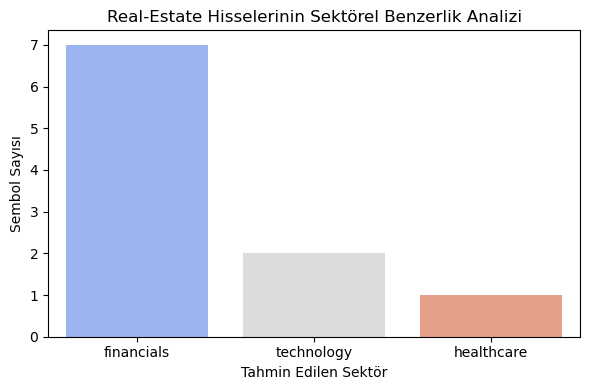

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

#sektörel benzerlik sayılarının görselleştirilmesi:
plt.figure(figsize=(6, 4))
sns.barplot(x=similarity_counts.index, y=similarity_counts.values, palette="coolwarm")
plt.title("Real-Estate Hisselerinin Sektörel Benzerlik Analizi")
plt.xlabel("Tahmin Edilen Sektör")
plt.ylabel("Sembol Sayısı")
plt.tight_layout()
plt.show()

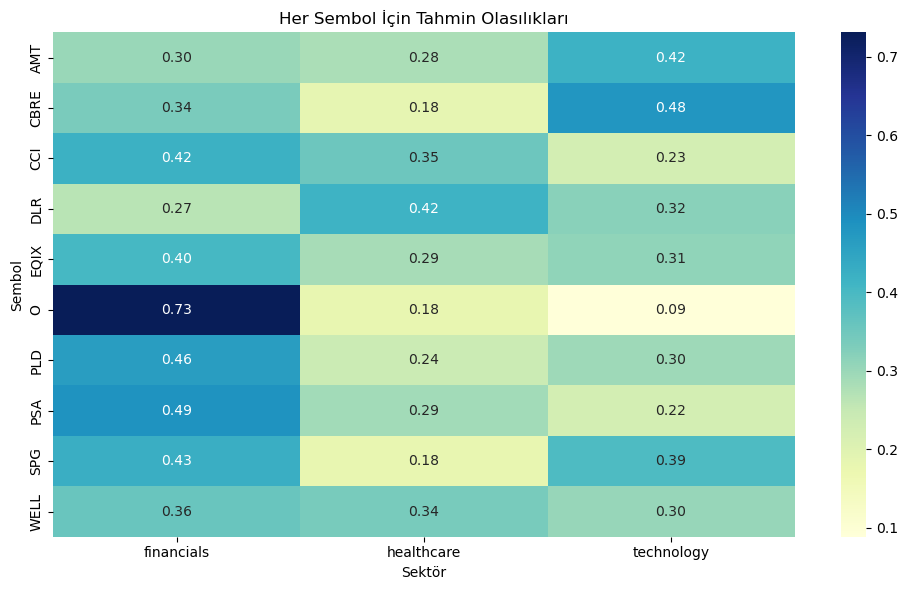

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# her sembol için tahmin olasılıklarının görselleştirilmesi:
plt.figure(figsize=(10, 6))
sns.heatmap(proba_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Her Sembol İçin Tahmin Olasılıkları")
plt.xlabel("Sektör")
plt.ylabel("Sembol")
plt.tight_layout()
plt.show()

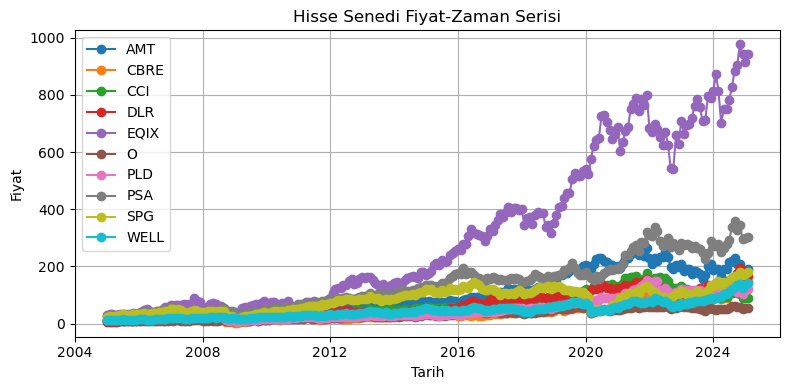

In [119]:
import matplotlib.pyplot as plt


# verileri sembol ve tarihe göre sıralayalım:
real_estate_df = real_estate_df.sort_values(by=['Symbol', 'Date'])

plt.figure(figsize=(8, 4)) 

# sembolleri alıp her biri için fiyat zaman serisi:
for symbol in real_estate_df['Symbol'].unique():
    df_symbol = real_estate_df[real_estate_df['Symbol'] == symbol]
    plt.plot(df_symbol['Date'], df_symbol['Price'], marker='o', label=symbol)

plt.title("Hisse Senedi Fiyat-Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

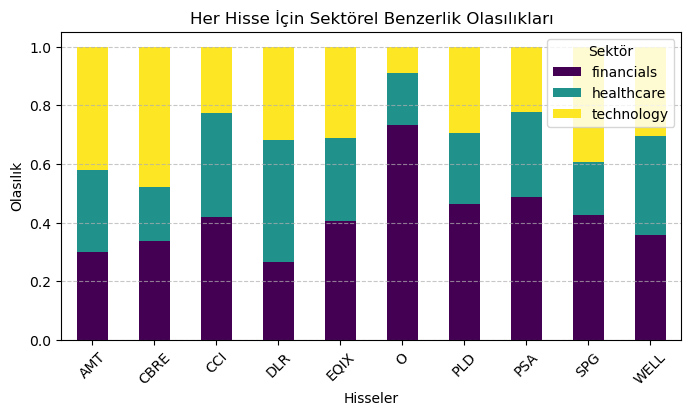

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
proba_df.plot(kind='bar', stacked=True, ax=ax, colormap="viridis")

plt.title("Her Hisse İçin Sektörel Benzerlik Olasılıkları")
plt.xlabel("Hisseler")
plt.ylabel("Olasılık")
plt.legend(title="Sektör")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

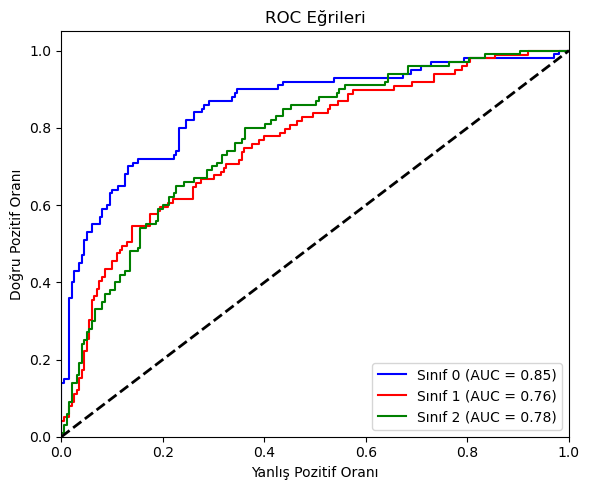

In [121]:
from sklearn.metrics import roc_curve, auc  
from sklearn.preprocessing import label_binarize  
import matplotlib.pyplot as plt  
import numpy as np  

# test setindeki sınıfları belirliyoruz
classes = np.unique(y_test) 

# binary hale getiriyoruz
y_test_bin = label_binarize(y_test, classes=classes)

# kaç farklı sınıf olduğunu belirliyoruz
n_classes = y_test_bin.shape[1]

# modelin test seti için tahmin ettiği olasılıkları alıyoruz
y_score = grid_search.predict_proba(X_test)

fpr = dict() 
tpr = dict()  
roc_auc = dict()  # ROC eğrisi altındaki alan AUC değeri

# Her sınıf için ROC eğrisi ve AUC hesaplaması:
for i in range(n_classes):
    # gerçek etiketlerle modelin tahmin ettiği olasılıkları kullanarak ROC eğrisi verilerini hesaplama
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    
    # AUC değerini hesaplama
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 5))

# her sınıf için farklı bir renk kullanarak ROC eğrisini çiziyoruz
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label=f'Sınıf {classes[i]} (AUC = {roc_auc[i]:0.2f})')  

# referans çizgisi eklme
plt.plot([0, 1], [0, 1], 'k--', lw=2)  

plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  

plt.xlabel('Yanlış Pozitif Oranı')  
plt.ylabel('Doğru Pozitif Oranı') 
plt.title('ROC Eğrileri')  

plt.legend(loc="lower right")

plt.tight_layout()

plt.show()

## Rapor
### Farklı Sektörlerdeki Hisse Senetlerinin Davranış Analizi ve Yatırım Stratejileri Raporu
Modelin tahminlerine göre, Real-Estate hisselerinin büyük bir bölümü Financials (7 hisse) sektörüne benzemektedir. Bununla birlikte, Technology (2 hisse) ve Healthcare (1 hisse) sektörleriyle de belirli düzeyde benzerlik göstermektedir. Bu çalışma, Real-Estate sektöründe faaliyet gösteren bazı şirketlerin iş modelleri, yatırım stratejileri ve piyasa dinamikleri açısından diğer sektörlerle neden benzerlik gösterdiğini analiz etmektedir. Ayrıca, bu benzerliklerden yola çıkarak yatırımcılara yönelik öneriler sunulacaktır.


### Farklı Sektörlerdeki Hisse Senetlerinin Davranış Analizi
**Financials Sektörüne Benzeyen Hisseler (7 Adet)**
Benzer Hisseler: CCI, O, PLD, PSA, SPG, EQIX, CBRE
Benzerlik Nedenleri: Finans sektörüne benzeyen bu Real-Estate hisseleri genellikle gayrimenkul yatırım ortaklıkları (REITs) veya ticari mülk finansmanı yapan şirketlerden oluşmaktadır. Bankaların ve yatırım şirketlerinin portföylerinde yer alan ticari gayrimenkuller bu hisse senetleriyle yüksek korelasyon gösterebilir. Ekonomik krizler ve faiz oranları bu hisseler üzerinde Financials sektöründeki şirketlere benzer bir etkiye sahiptir.

**Technology Sektörüne Benzeyen Hisseler (2 Adet)**
Benzer Hisseler: AMT, CBRE
Benzerlik Nedenleri: Teknoloji sektörüne benzeyen Real-Estate hisseleri genellikle veri merkezleri, bulut bilişim, akıllı binalar ve dijital altyapı yatırımları yapan şirketlerdir.
Örneğin, American Tower (AMT) ve CBRE gibi şirketler, telekomünikasyon altyapısına ve veri merkezlerine yaptığı yatırımlarla teknoloji hisseleriyle benzer bir volatiliteye sahiptir. Bu tür şirketler, teknoloji sektöründeki büyüme ve yatırımlardan doğrudan etkilenebilir.

**Healthcare Sektörüne Benzeyen Hisseler (1 Adet)**
Benzer Hisse: DLR
Benzerlik Nedenleri: Sağlık sektörüne benzeyen Real-Estate hisseleri, genellikle hastaneler, yaşlı bakım merkezleri ve sağlık kompleksleri için özel olarak geliştirilmiş gayrimenkullere yatırım yapan firmalar ile ilişkilidir.
Örneğin, DLR (Digital Realty) gibi şirketler, sağlık sektörüne yönelik veri altyapısı sağlama veya sağlık hizmetleri için gayrimenkul geliştirme gibi faaliyetlerde bulunabilir.


### Yatırım Stratejileri İçin Kullanılabilecek Sektörel Benzerlik Bilgisi
Modelin sektörel benzerlik analizine dayanarak, yatırımcılar için bazı önemli stratejik çıkarımlar yapılabilir.
**Eğer bir yatırımcı faiz oranlarına duyarlı hisseler arıyorsa, Financials sektörüne benzer hisselere yatırım yapmalıdır.**&
**Teknoloji trendlerinden yararlanmak isteyen yatırımcılar, Technology sektörüne benzeyen Real-Estate hisselerine odaklanmalıdır.**&
**Sağlık hizmetleri alanında uzun vadeli istikrar arayan yatırımcılar, Healthcare sektörüne benzeyen Real-Estate hisselerini tercih edebilir.**